# Implementing KNN with Cross- validation

# References:
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://stackoverflow.com

https://stats.idre.ucla.edu/r/dae/logit-regression/

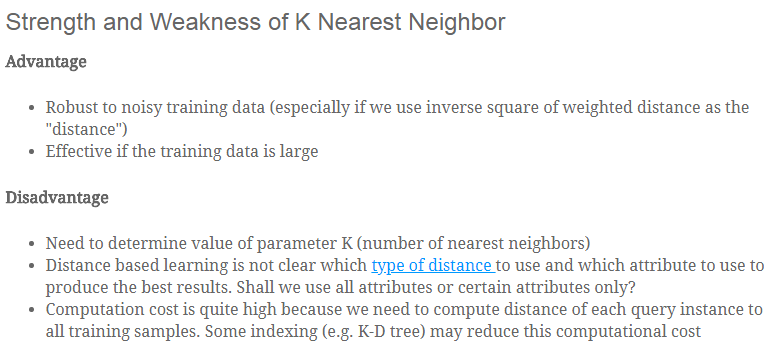

## Assumptions of KNN

KNN assumes that the data is in a feature space. More exactly, the data points are in a metric space. The data can be scalars or possibly even multidimensional vectors. Since the points are in feature space, they have a notion of distance – This need not necessarily be Euclidean distance although it is the one commonly used.

Each of the training data consists of a set of vectors and class label associated with each vector. In the simplest case , it will be either + or – (for positive or negative classes). But KNN , can work equally well with arbitrary number of classes.

We are also given a single number "k" . This number decides how many neighbors (where neighbors is defined based on the distance metric) influence the classification. This is usually a odd number if the number of classes is 2. If k=1 , then the algorithm is simply called the nearest neighbor algorithm.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
from sklearn import metrics

In [4]:
df = pd.read_csv('C:/Users/Akshat/Downloads/binary.csv')
df.head()
# This dataset is obtained from UCLA stats site and has total four variables

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
# Our target variable is admit and remaining three are the predictors
df.shape # There are 400 rows with 4 variables

(400, 4)

In [5]:
# Converting the variable admit from discrete to categorical
df['admit'] = np.where(df['admit']==0, 'Admission', 'Rejection')

In [12]:
df.head()

,admit,gre,gpa,rank
0,Admission,380,3.61,3
1,Rejection,660,3.67,3
2,Rejection,800,4.00,1
3,Rejection,640,3.19,4
4,Admission,520,2.93,4


# Creating training and test data

In [39]:
,# The columns that we will be making predictions with.
x_columns = ['gre', 'gpa', 'rank']
# The column that we want to predict.
y_column = ["admit"]
X=df[x_columns]
Y=df[y_column]

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Using KNN algorithm on our training and test data

<b>Result: our model predicted 64.6% correctly </b>


# Creating another model with a different value of K

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) # this time the value of K=8
# Fitting the model on the training data.
knn.fit(X_train, Y_train)
# Make point predictions on the test set using the fit model.
predictions = knn.predict(X_test)

In [83]:
#Checking the accuracy of our model by comparing it with the actual value
print (metrics.accuracy_score(Y_test,predictions))

0.675


In [84]:
from sklearn.metrics import confusion_matrix,classification_report
print (metrics.classification_report(Y_test, predictions))

             precision    recall  f1-score   support

  Admission       0.68      0.96      0.80        81
  Rejection       0.50      0.08      0.13        39

avg / total       0.62      0.68      0.58       120



In [85]:
from sklearn.metrics import confusion_matrix,classification_report
print (metrics.confusion_matrix(Y_test, predictions))

[[78  3]
 [36  3]]


<b> As we can see, the accuracy increased to 67.5%  </b>

# To test the model on different values of K

In [86]:
# Test k values 1 through 20
cross_k = range(1, 20)

# Set an empty list
accuracy = []

# Repeating the above process for all k values and appending the result
for k in cross_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, predictions))

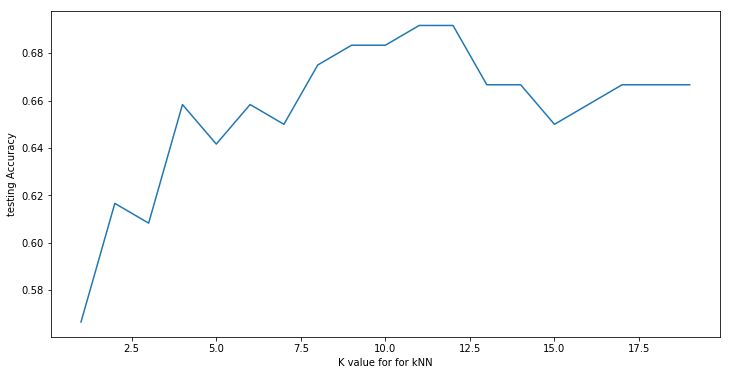

In [87]:
# Plot against the k value and Accuracy to identify the best value of K
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(cross_k, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('testing Accuracy')


In [65]:
c,r=Y_train.shape
Y_train=np.ravel(Y_train,order=c)

## Using Cross-validation to test the model on different values of K

In [88]:
k=range(1,11)
a=[]
for i in k:
    #kfold = model_selection.KFold(n_splits=i, random_state=7)
    modelCV = KNeighborsClassifier(n_neighbors=i)
    scoring = 'accuracy'
    results=(model_selection.cross_val_score(modelCV, X_train, Y_train, cv=10, scoring=scoring))
    a.append(results.mean())

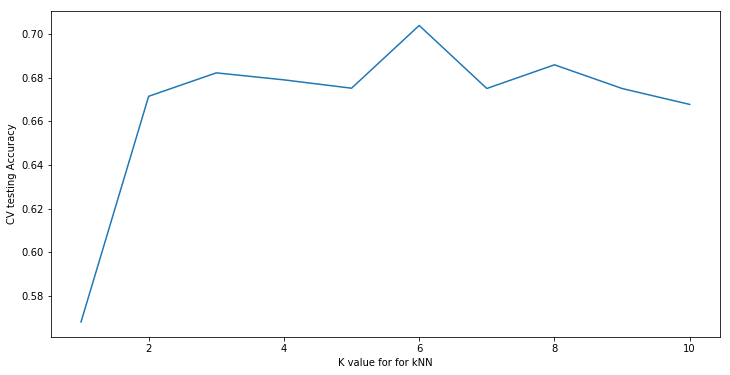

In [89]:
# Plot against the k value and Accuracy to identify the best value of K
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(k, a)
plt.xlabel('K value for for kNN')
plt.ylabel('CV testing Accuracy')


 # Conclusion:
<b> As per the above graph, the accuracy is highest when the value of K is 6 and lowest when it's 1 </b>